In [1]:
# 라이브러리 설정
import math
import cv2
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt

In [2]:
# Initializing mediapipe pose class.
# mediapipe pose class를 초기화 한다.
mp_pose = mp.solutions.pose
 
# Setting up the Pose function.
# pose detect function에 image detect=True, 최소감지신뢰도 = 0.3, 모델 복잡도 =2를 준다.
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2)
 
# Initializing mediapipe drawing class, useful for annotation.
# mediapipe의 drawing class를 초기화한다.
mp_drawing = mp.solutions.drawing_utils

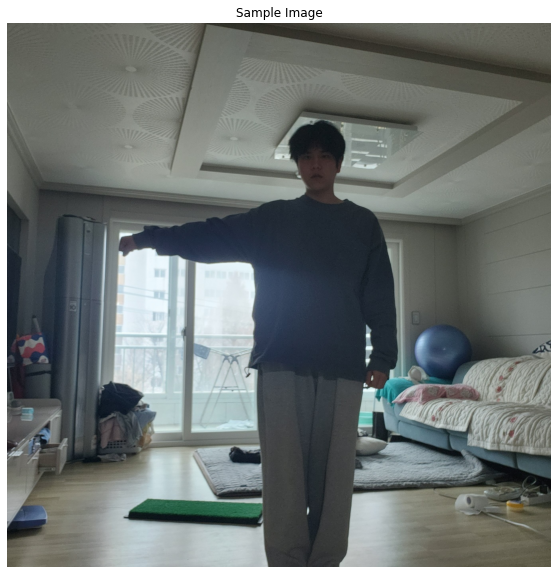

In [3]:
# 이미지 읽어오기
# 샘플 이미지를 cv2.imread()로 읽어온다
# Read an image from the specified path.
sample_img = cv2.imread('./Pose_test/righthand_pose.jpg')
 
# Specify a size of the figure.
plt.figure(figsize = [10, 10])
 
# Display the sample image, also convert BGR to RGB for display. 
plt.title("Sample Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

In [4]:
# pose detect 수행
# Perform pose detection after converting the image into RGB format.
results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))
 
# Check if any landmarks are found.
if results.pose_landmarks:
    
    # Iterate two times as we only want to display first two landmarks.
    for i in range(32):
        
        # Display the found normalized landmarks.
        print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}')

NOSE:
x: 0.5699153542518616
y: 0.2623986601829529
z: -0.3854987621307373
visibility: 0.9999102354049683

LEFT_EYE_INNER:
x: 0.5776235461235046
y: 0.2443007379770279
z: -0.3572327494621277
visibility: 0.9997130036354065

LEFT_EYE:
x: 0.5845162272453308
y: 0.2436712384223938
z: -0.3577723205089569
visibility: 0.9997074007987976

LEFT_EYE_OUTER:
x: 0.5921729803085327
y: 0.24389512836933136
z: -0.35772469639778137
visibility: 0.9997830986976624

RIGHT_EYE_INNER:
x: 0.562116801738739
y: 0.24644841253757477
z: -0.35272619128227234
visibility: 0.9997367262840271

RIGHT_EYE:
x: 0.5569316744804382
y: 0.24673189222812653
z: -0.3533322811126709
visibility: 0.9997592568397522

RIGHT_EYE_OUTER:
x: 0.5505529046058655
y: 0.24642792344093323
z: -0.3536734879016876
visibility: 0.9997876286506653

LEFT_EAR:
x: 0.6030905842781067
y: 0.25401973724365234
z: -0.18554507195949554
visibility: 0.9998090863227844

RIGHT_EAR:
x: 0.5443921089172363
y: 0.2512953281402588
z: -0.16516989469528198
visibility: 0.99924

In [5]:
# Retrieve the height and width of the sample image.
image_height, image_width, _ = sample_img.shape
 
# Check if any landmarks are found.
if results.pose_landmarks:
    
    # Iterate two times as we only want to display first two landmark.
    for i in range(32):
        
        # Display the found landmarks after converting them into their original scale.
        print(f'{mp_pose.PoseLandmark(i).name}:') 
        print(f'x: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].x * image_width}')
        print(f'y: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].y * image_height}')
        print(f'z: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].z * image_width}')
        print(f'visibility: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].visibility}\n')

NOSE:
x: 779.6442046165466
y: 358.96136713027954
z: -527.3623065948486
visibility: 0.9999102354049683

LEFT_EYE_INNER:
x: 790.1890110969543
y: 334.20340955257416
z: -488.6944012641907
visibility: 0.9997130036354065

LEFT_EYE:
x: 799.6181988716125
y: 333.3422541618347
z: -489.43253445625305
visibility: 0.9997074007987976

LEFT_EYE_OUTER:
x: 810.0926370620728
y: 333.6485356092453
z: -489.3673846721649
visibility: 0.9997830986976624

RIGHT_EYE_INNER:
x: 768.975784778595
y: 337.1414283514023
z: -482.52942967414856
visibility: 0.9997367262840271

RIGHT_EYE:
x: 761.8825306892395
y: 337.5292285680771
z: -483.3585605621338
visibility: 0.9997592568397522

RIGHT_EYE_OUTER:
x: 753.156373500824
y: 337.11339926719666
z: -483.82533144950867
visibility: 0.9997876286506653

LEFT_EAR:
x: 825.02791929245
y: 347.4990005493164
z: -253.8256584405899
visibility: 0.9998090863227844

RIGHT_EAR:
x: 744.7284049987793
y: 343.772008895874
z: -225.95241594314575
visibility: 0.9992434978485107

MOUTH_LEFT:
x: 794.7

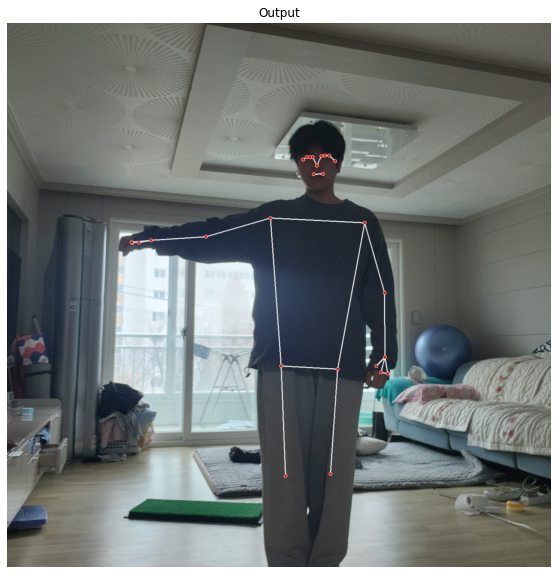

In [6]:
# 랜드마크를 그릴 사진을 COPY한다.
img_copy = sample_img.copy()
 
# 랜드마크를 찾는다.
if results.pose_landmarks:
    
    # sample image에 landmark를 그린다.
    mp_drawing.draw_landmarks(image=img_copy, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)
       
    # figure의 크기를 설정한다.
    fig = plt.figure(figsize = [10, 10])
 
    # landmark가 draw된 image를 보여주기 전에 BGR TO RGB를 위해 copy_image의 순서를 반대로 변형해준다. 
    plt.title("Output");plt.axis('off');plt.imshow(img_copy[:,:,::-1]);plt.show()

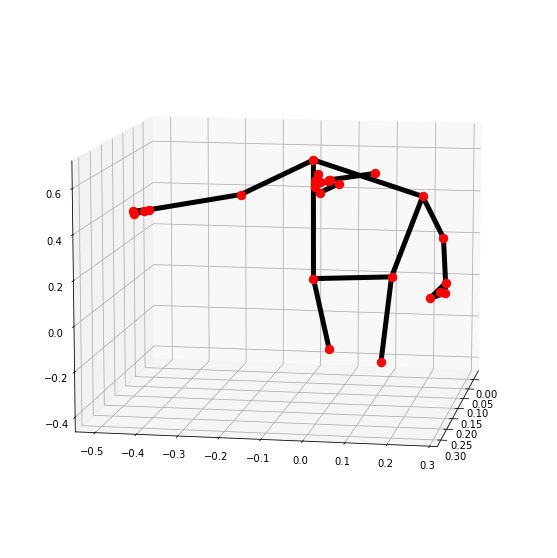

In [7]:
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

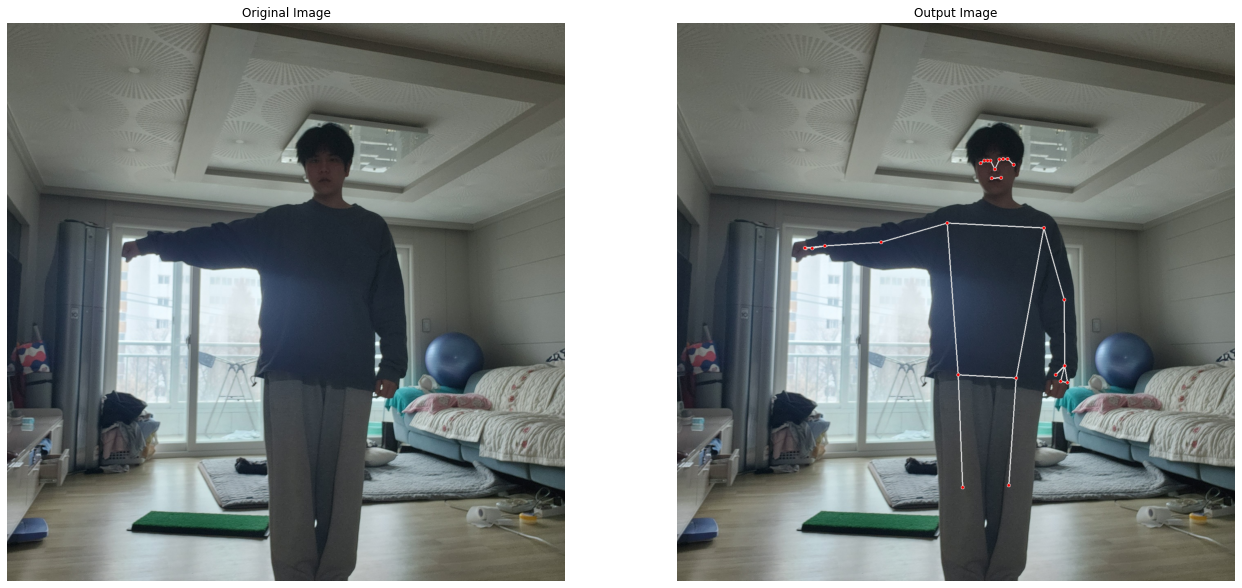

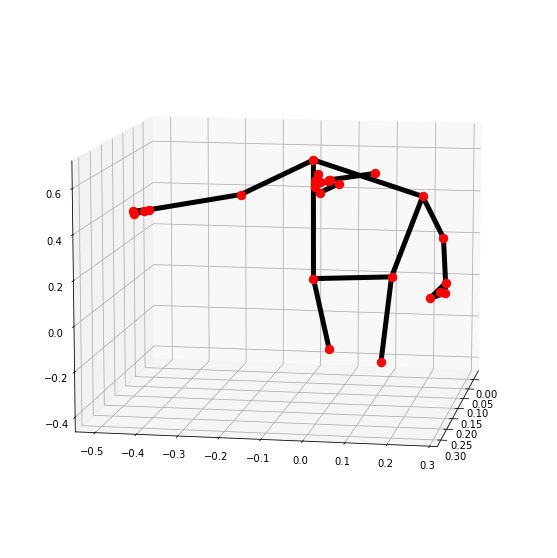

In [8]:
def detectPose(image, pose, display=True):
    '''
    This function performs pose detection on an image.
    Args:
        image: The input image with a prominent person whose pose landmarks needs to be detected.
        pose: The pose setup function required to perform the pose detection.
        display: A boolean value that is if set to true the function displays the original input image, the resultant image, 
                 and the pose landmarks in 3D plot and returns nothing.
    Returns:
        output_image: The input image with the detected pose landmarks drawn.
        landmarks: A list of detected landmarks converted into their original scale.
    '''
    # 예시이미지 copy하기
    output_image = image.copy()

    # 컬러 이미지 BGR TO RGB 변환
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # pose detection 수행
    results = pose.process(imageRGB)

    # input image의 너비&높이 탐색
    height, width, _ = image.shape

    # detection landmarks를 저장할 빈 list 초기화
    landmarks = []

    # landmark가 감지 되었는지 확인
    if results.pose_landmarks:

      # landmark 그리기
      mp_drawing.draw_landmarks(image=output_image, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)

      # 감지된 landmark 반복
      for landmark in results.pose_landmarks.landmark:

        # landmark를 list에 추가하기
        landmarks.append((int(landmark.x * width), int(landmark.y * height), (landmark.z * width)))

    # 오리지널 image와 pose detect된 image 비교
    if display:

      # 오리지널 & 아웃풋 이미지 그리기
      plt.figure(figsize=[22,22])
      plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
      plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');

      # 3D 랜드마크 나타내기
      mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

    # 그렇지 않다면, output_image 와 landmark return한다
    else:

      return output_image, landmarks
# pose detection function start

image = cv2.imread('./Pose_test/righthand_pose.jpg')
detectPose(image, pose, display=True)

In [9]:
# 앵글 계산 함수
def calculateAngle(landmark1, landmark2, landmark3):

    # Get the required landmarks coordinates.
    x1, y1, _ = landmark1
    x2, y2, _ = landmark2
    x3, y3, _ = landmark3

    # Calculate the angle between the three points
    angle = math.degrees(math.atan2(y3 - y2, x3 - x2) - math.atan2(y1 - y2, x1 - x2))
    
    # Check if the angle is less than zero.
    if angle < 0:

        # Add 360 to the found angle.
        angle += 360
        
    # Return the calculated angle.
    return angle



In [10]:
output_image, landmarks = detectPose(image, pose, display=False)
shoulder = landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value]
elbow = landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value]
wrist = landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value]
calculateAngle(shoulder, elbow, wrist)

192.44728661711923

In [11]:
shoulder, elbow, wrist

((662, 490, -53.18196648359299),
 (500, 537, -90.67827647924423),
 (362, 546, -378.09868812561035))

In [12]:
# 분류 함수

def classifyPose(landmarks, output_image, display=False):
    
    # Initialize the label of the pose. It is not known at this stage.
    label = 'Unknown Pose'

    # Specify the color (Red) with which the label will be written on the image.
    color = (0, 0, 255)
    
    # Calculate the required angles.
    #----------------------------------------------------------------------------------------------------------------
    
    # Get the angle between the left shoulder, elbow and wrist points. 
    # 11번, 13번, 15번 landmark 
    # 왼쪽 어깨, 왼쪽 팔꿈치, 왼쪽 손목 landmark angle 값 계산 
    left_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value])
    
    # 12번, 14번, 16번 landmark 
    # 오른쪽 어깨, 오른쪽 팔꿈치, 오른쪽 손목 landmark angle 값 계산 
    right_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value])   
    # 13번, 15번, 23번 landmark 
    # 왼쪽 어깨, 왼쪽 팔꿈치, 왼쪽 엉덩이, landmark angle 값 계산 
    left_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_HIP.value])

    # 12번, 14번, 24번 landmark 
    # 오른쪽 어깨, 오른쪽 팔꿈치, 오른쪽 엉덩이 landmark angle 값 계산  
    right_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value])

    # 23번, 25번, 27번 landmark 
    # 왼쪽 엉덩이, 왼쪽 무릎, 왼쪽 발목 landmark angle 값 계산 
    left_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value])

    # 24번, 26번, 28번 landmark 
    # 오른쪽 엉덩이, 오른쪽 무릎, 오른쪽 발목  landmark angle 값 계산 
    right_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value])
    
    #----------------------------------------------------------------------------------------------------------------
    
    # 전사포즈 vs T포즈 비교
    # 두 포즈 모두 양팔을 곧게 펴고 어깨를 일정한 각도로 유지한다.
    # 전사 포즈는 다리를 벌리지만, T포즈는 다리를 일자리 쭉 펴고 있다는 점 이 다르다
        
    # 양팔을 모두 곧게 펴고 있는지 체크한다
    # 왼쪽, 오른쪽 팔, 어깨, 팔꿈치의 각도가 165 ~ 195도 사이에 위치하는지 확인한다.
    if right_elbow_angle > 165 and right_elbow_angle < 195:
        label = 'righthand_pose' 
                        
    

    #----------------------------------------------------------------------------------------------------------------
    
    # 트리포즈
    #----------------------------------------------------------------------------------------------------------------
    
    # 양발 중 한 발을 곧게 펴고 있는지 확인
    if left_knee_angle > 165 and left_knee_angle < 195 or right_knee_angle > 165 and right_knee_angle < 195:

        # 양발 중 다른 한 발이 왼쪽이라면 315 ~ 335, 오른쪽이라면 25 ~ 45로 구부러져 있는지
        if left_knee_angle > 315 and left_knee_angle < 335 or right_knee_angle > 25 and right_knee_angle < 45:

            # Specify the label of the pose that is tree pose.
            label = 'Tree Pose'
                
    #----------------------------------------------------------------------------------------------------------------
    
    # 포즈 분류가 잘 되었는지 확인
    if label != 'Unknown Pose':
        
        color = (0, 255, 0)  
    
    # 분류되지 않은 자세라면 Unkwown Pose로 왼쪽 상단에 연두색으로 text 입력
    cv2.putText(output_image, label, (10, 30),cv2.FONT_HERSHEY_PLAIN, 2, color, 2)
    
    # 결과 이미지 보여주기 Check if the resultant image is specified to be displayed.
    if display:
    
        # 결과 이미지를 BGR TO RGB로 matplotlib을 이용해 꺼내준다.
        plt.figure(figsize=[10,10])
        plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
        
    else:
        # 결과 이미지랑 표시될 label을 return 한다
        return output_image, label

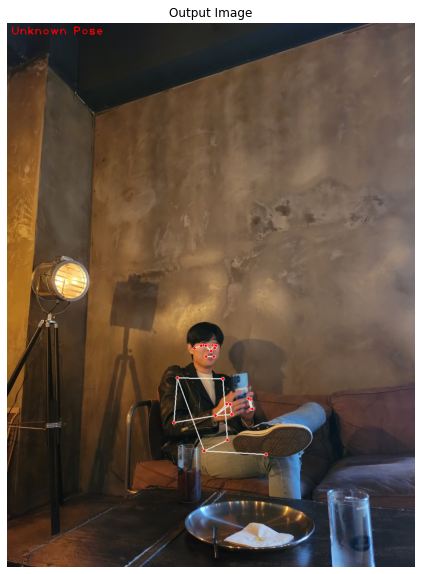

In [13]:
image = cv2.imread('./Pose_test/not_righthand.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)